In [ ]:
# The following codes are adapted from the ones Dr. Erik K. Grimmelmann posted on BB

# Intro

(1)libraries used

(2)data set

(3)getting started

**imported libraries/modules**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import statistics

from mpl_toolkits import mplot3d
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

**Iris data set**

In [ ]:
# import the Iris data set
iris = datasets.load_iris()
X = iris.data#X variables:(1)sepal length(2)sepal width(3)petal length(4)petal width
Y = iris.target#Y variables:0 is Setota, 1 is Versicolor, 2 is Virginica
Xzeros0 = (0. * X) + .2
Xzeros1 = (0. * X) 
Xzeros2 = (0. * X) - .2
x_min, x_max = X.min() - 0.5, X.max() + 1.5

#show the data
# for i in range (len(Y)):
#     print (i, X[i,:],Y[i])

In [ ]:
# get Iris classifications
IC = np.unique(Y)
IrisC = ('Setosa','Versicolor','Virginica')
pltC = ('red', 'blue', 'green')
pltCback = ('pink', 'lightblue','lightgreen')
pltM = ('o', 'x', '*')
for i in range(0,3):
    print (IC[i],pltM[i],IrisC[i],pltC[i],pltCback[i])
          
# setup Iris feature lablels
IrisF=("sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)")
for i in range(0,4):
    print(IrisF[i])

0 o Setosa red pink
1 x Versicolor blue lightblue
2 * Virginica green lightgreen
sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


#The number of features used in the modeling: 

(1)one feature

(2)two features

(3)three features

(4)four features

all features(A,B,C,D): (1)sepal length(2)sepal width(3)petal length(4)petal width

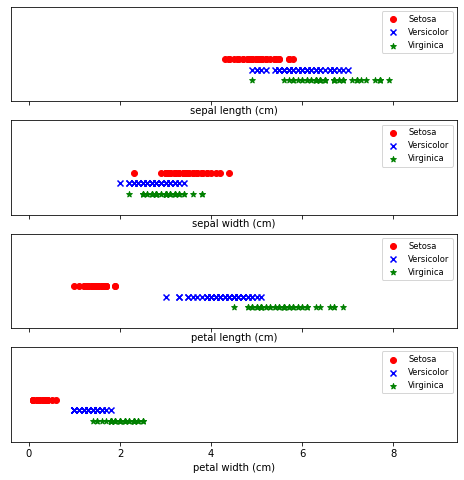

In [ ]:
# plot data for all features 
plt.close('all')
fig, ax = plt.subplots(nrows=4, ncols=1, figsize= (8,8), sharex=True)

for i in range(4):
    x1F = IrisF[i]#Iris feature lablels
    ax[i].scatter(X[Y == IC[0], i], Xzeros0[Y == IC[0],i],
                  color=pltC[0], marker=pltM[0], label=IrisC[0])#use of masking index, IC[0]=0 which is for Setosa, i is the col number("feature")
    ax[i].scatter(X[Y == IC[1], i], Xzeros1[Y == IC[1],i], 
                  color=pltC[1], marker=pltM[1], label=IrisC[1])
    ax[i].scatter(X[Y == IC[2], i], Xzeros2[Y == IC[2],i], 
                  color=pltC[2], marker=pltM[2], label=IrisC[2])
    ax[i].set_xlim(x_min,x_max)
    ax[i].set_ylim(-.6,+1.2)
    ax[i].set_xlabel(x1F)
    ax[i].axes.yaxis.set_visible(False)
    ax[i].legend(loc='upper right',fontsize='small')
      
plt.show()    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


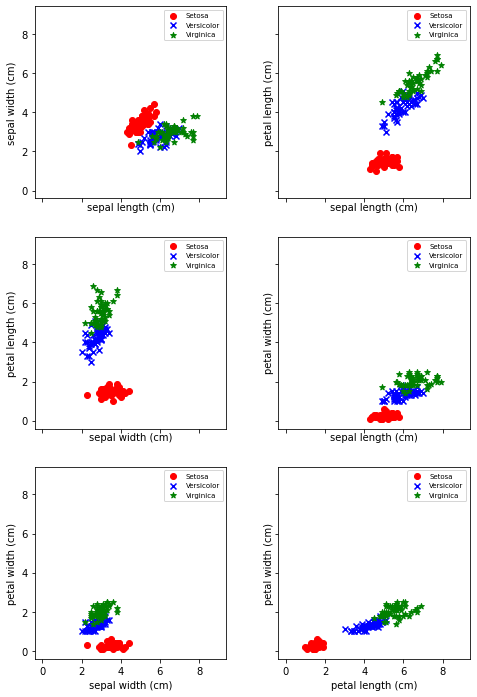

In [ ]:
# plot data for all pairs of features 

plt.close('all')
fig, ax = plt.subplots(nrows=3, ncols=2, figsize= (8,12), sharex=True, sharey=True)

i = 0
k = 0
k1 = 0
k2 = 0
while i < 4:
    x2F = IrisF[i]#Iris feature lablels
    j = 0
    while j < i:
        k1 = np.int(k/2)
        k2 = np.mod(k,2)
        x1F = IrisF[j]#Iris feature lablels
        ax[k1,k2].scatter(X[Y == IC[0], j], X[Y == IC[0], i], 
                          color=pltC[0], marker=pltM[0], label=IrisC[0])
        ax[k1,k2].scatter(X[Y == IC[1], j], X[Y == IC[1], i], 
                          color=pltC[1], marker=pltM[1], label=IrisC[1])
        ax[k1,k2].scatter(X[Y == IC[2], j], X[Y == IC[2], i], 
                          color=pltC[2], marker=pltM[2], label=IrisC[2])
        ax[k1,k2].set(aspect='equal')
        ax[k1,k2].set_xlim(x_min,x_max)
        ax[k1,k2].set_ylim(x_min,x_max)
        ax[k1,k2].set_xlabel(x1F)
        ax[k1,k2].set_ylabel(x2F)
        ax[k1,k2].legend(loc='upper right', fontsize='x-small')
        j += 1
        k += 1
    i += 1
plt.show()    

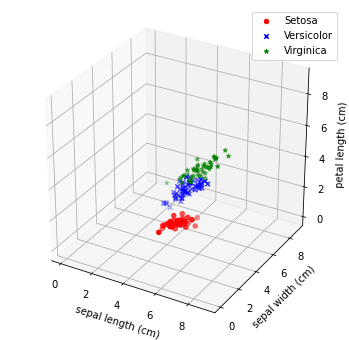

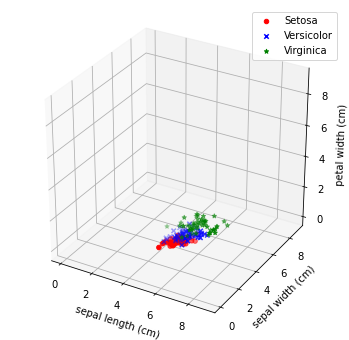

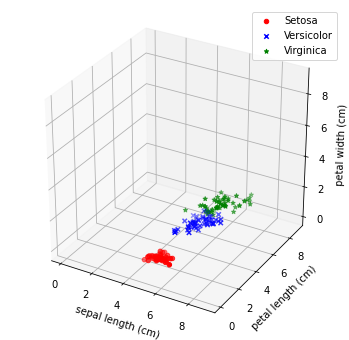

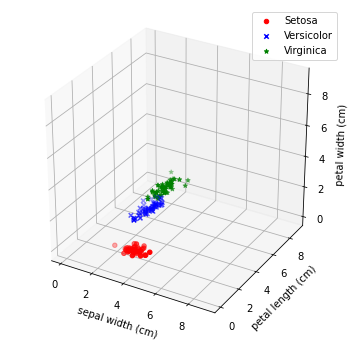

In [ ]:
# plot data for all combinations of three features 

plt.close('all')

ix = [0,0,0,1]
iy = [1,1,2,2]
iz = [2,3,3,3]

for m in range(4):
    
    ixm = ix[m]
    iym = iy[m]
    izm = iz[m]
    xF = IrisF[ixm]
    yF = IrisF[iym]
    zF = IrisF[izm]

    fig = plt.figure(figsize=(6,6))    
    ax = plt.axes(projection='3d')   
    
    ax.scatter3D(X[Y == IC[0],ixm], X[Y == IC[0],iym], X[Y == IC[0],izm], 
        color=pltC[0], marker=pltM[0], label=IrisC[0])
    ax.scatter3D(X[Y == IC[1],ixm], X[Y == IC[1],iym], X[Y == IC[1],izm], 
        color=pltC[1], marker=pltM[1], label=IrisC[1])
    ax.scatter3D(X[Y == IC[2],ixm], X[Y == IC[2],iym], X[Y == IC[2],izm], 
        color=pltC[2], marker=pltM[2], label=IrisC[2])
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(x_min,x_max)
    ax.set_zlim(x_min,x_max)
    ax.set_xlabel(xF)
    ax.set_ylabel(yF)
    ax.set_zlabel(zF)            
    ax.legend(loc='upper right', fontsize='medium')

plt.show()    

#Codes written by professor

(1) choose the classes and features to be included in the model

(2) build the XX and YY arrays

(3)fit the model-getting score

(4)plot data for this pair of features and classes

In [ ]:
# now choose the classes and features to be modeled.

# note that if more than two classes are specified, scikit learn will use a multiclass model.

In [ ]:
# choose the classes and features to be included in the model

cdx = np.array([0,1])# this array contains the classes to be considered (can be 2-3 classes)
fdx = np.array([0,1])# this array contains the features to be considered (can be 1-4 features)

nC = len(cdx)
nF = len(fdx)

print ('\nClasses')
for i in range(nC):
    print (cdx[i],IrisC[cdx[i]])
    
print ('\nFeatures')
for i in range(nF):
    print (fdx[i],IrisF[fdx[i]])


def ml_printInfo(cdx,fdx):
  nC = len(cdx)
  nF = len(fdx)

  print ('\nClasses')
  for i in range(nC):
    print (cdx[i],IrisC[cdx[i]])
    
  print ('\nFeatures')
  for i in range(nF):
    print (fdx[i],IrisF[fdx[i]])


Classes
0 Setosa
1 Versicolor

Features
0 sepal length (cm)
1 sepal width (cm)


In [ ]:
# build the XX and YY arrays
# these arrays contain the samples in the classes specified in cdx and include the features specified in fdx

i = 0
numY = 0
for i in range(len(Y)):#Y variables:0 is Setota, 1 is Versicolor, 2 is Virginica
    for j in range(nC):
        if Y[i] == IC[cdx[j]]:
            numY += 1

YY = np.zeros((numY))
XX = np.zeros((numY,nF))
if (len(fdx) == 1):
    XXzeros0 = (0. * XX) + .2
    XXzeros1 = (0. * XX) 
    XXzeros2 = (0. * XX) - .2

j = 0
for i in range(len(Y)):
    for k in range(nC):
        if Y[i] == IC[cdx[k]]:        
            YY[j] = IC[cdx[k]]
            for m in range(nF):
                XX[j,m] = X[i,fdx[m]] 
            j += 1

def ml_xy(cdx,fdx):
  nC = len(cdx)
  nF = len(fdx)
  #count the number of XX and YY
  i = 0
  numY = 0
  for i in range(len(Y)):#Y variables:0 is Setota, 1 is Versicolor, 2 is Virginica
    for j in range(nC):
        if Y[i] == IC[cdx[j]]:
            numY += 1

  YY = np.zeros((numY))
  XX = np.zeros((numY,nF))
  if (len(fdx) == 1):
    XXzeros0 = (0. * XX) + .2
    XXzeros1 = (0. * XX) 
    XXzeros2 = (0. * XX) - .2
  
  j = 0
  for i in range(len(Y)):
    for k in range(nC):
        if Y[i] == IC[cdx[k]]:        
            YY[j] = IC[cdx[k]]
            for m in range(nF):
                XX[j,m] = X[i,fdx[m]] 
            j += 1
  return XX,YY

In [ ]:
# fit the model

# clf = Perceptron(tol=1e-4, random_state=0)
clf = SGDClassifier(tol=1e-4, random_state=0)
clf.fit(XX,YY)
print('\nScore: ',clf.score(XX,YY))

def ml_score(XX,YY):
  clf = SGDClassifier(tol=1e-4, random_state=0)
  clf.fit(XX,YY)
  return clf.score(XX,YY)


Score:  0.99


In [ ]:
P = clf.get_params()
print ('\nAttributes: ',P)


Attributes:  {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


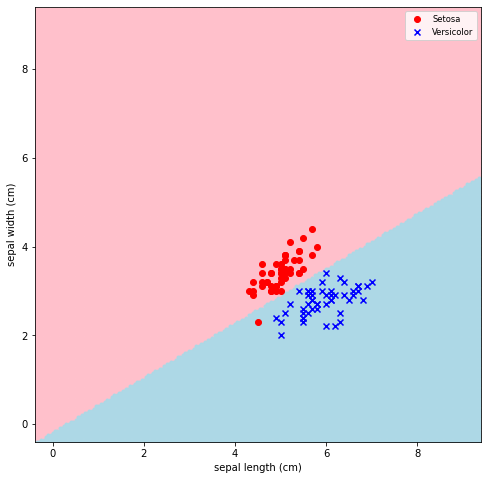

In [ ]:
## plot data for this pair of features and classes

plt.close('all')
if (len(fdx) == 1):
    
    fig, ax = plt.subplots(figsize=(8,2))
    
    xx = np.arange(x_min,x_max, 0.05).reshape((-1,1))
    yy = clf.predict(xx)
    
    xxzeros1 = (0. * xx) + .5

# plot the decision regions

    if (IC[0] in cdx): ax.scatter(xx[yy == IC[0],0], xxzeros1[yy == IC[0]],
                    color=pltC[0], marker='.')
    if (IC[1] in cdx): ax.scatter(xx[yy == IC[1],0], xxzeros1[yy == IC[1]],
                    color=pltC[1], marker='.')
    if (IC[2] in cdx): ax.scatter(xx[yy == IC[2],0], xxzeros1[yy == IC[2]],
                    color=pltC[2], marker='.')   

# plot the data

    if (IC[0] in cdx): ax.scatter(XX[YY == IC[0],0], XXzeros0[YY == IC[0]],
                    color=pltC[0], marker=pltM[0], label=IrisC[0])
    if (IC[1] in cdx): ax.scatter(XX[YY == IC[1],0], XXzeros1[YY == IC[1]],
                    color=pltC[1], marker=pltM[1], label=IrisC[1])
    if (IC[2] in cdx): ax.scatter(XX[YY == IC[2],0], XXzeros2[YY == IC[2]],
                    color=pltC[2], marker=pltM[2], label=IrisC[2])    
    
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(-1.,+2.)
    ax.set_xlabel(IrisF[fdx[0]])
    ax.axes.yaxis.set_visible(False)
    ax.legend(loc='upper right', fontsize='x-small')
    plt.show()    

elif (len(fdx) == 2):
    
    fig, ax = plt.subplots(figsize=(8,8))

    xx1, xx2 = np.meshgrid(np.arange(x_min,x_max,0.05), np.arange(x_min,x_max,0.05))                     
    yy = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    yy = yy.reshape(xx1.shape)

# plot the decision regions    
    
    if (IC[0] in cdx): ax.scatter(xx1[yy == IC[0]], xx2[yy == IC[0]],
                    color=pltCback[0], marker='.')
    if (IC[1] in cdx): ax.scatter(xx1[yy == IC[1]], xx2[yy == IC[1]], 
                    color=pltCback[1], marker='.')
    if (IC[2] in cdx): ax.scatter(xx1[yy == IC[2]], xx2[yy == IC[2]],
                    color=pltCback[2], marker='.')    

# plot the data

    if (IC[0] in cdx): ax.scatter(XX[YY == IC[0],0], XX[YY == IC[0],1],
                    color=pltC[0], marker=pltM[0], label=IrisC[0])
    if (IC[1] in cdx): ax.scatter(XX[YY == IC[1],0], XX[YY == IC[1],1], 
                    color=pltC[1], marker=pltM[1], label=IrisC[1])
    if (IC[2] in cdx): ax.scatter(XX[YY == IC[2],0], XX[YY == IC[2],1],
                    color=pltC[2], marker=pltM[2], label=IrisC[2])
        
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(x_min,x_max)
    ax.set_xlabel(IrisF[fdx[0]])
    ax.set_ylabel(IrisF[fdx[1]])
    ax.legend(loc='upper right', fontsize='small')
    plt.show()    
    
elif (len(fdx) == 3):
    
    ixm = fdx[0]
    iym = fdx[1]
    izm = fdx[2]
    xF = IrisF[ixm]
    yF = IrisF[iym]
    zF = IrisF[izm]

    fig = plt.figure(figsize=(6,6))    
    ax = plt.axes(projection='3d')   

# plot the data points

    if (IC[0] in cdx): ax.scatter3D(X[Y == IC[0],ixm], X[Y == IC[0],iym], X[Y == IC[0],izm], 
        color=pltC[0], marker=pltM[0], label=IrisC[0])
    if (IC[1] in cdx): ax.scatter3D(X[Y == IC[1],ixm], X[Y == IC[1],iym], X[Y == IC[1],izm], 
        color=pltC[1], marker=pltM[1], label=IrisC[1])
    if (IC[2] in cdx): ax.scatter3D(X[Y == IC[2],ixm], X[Y == IC[2],iym], X[Y == IC[2],izm], 
        color=pltC[2], marker=pltM[2], label=IrisC[2])    

    ax.set_xlim(x_min,x_max)
    ax.set_ylim(x_min,x_max)
    ax.set_zlim(x_min,x_max)
    ax.set_xlabel(xF)
    ax.set_ylabel(yF)
    ax.set_zlabel(zF)            
    ax.legend(loc='upper right', fontsize='small')
    plt.show() 
    
# if there are two classes, add the decision boundary and plot again
            
    A = clf.fit(XX,YY)
    Acl =  A.classes_
    if (len(Acl) == 2):  
        
        fig = plt.figure(figsize=(6,6))    
        ax = plt.axes(projection='3d')   

    # plot the data points

        if (IC[0] in cdx): ax.scatter3D(X[Y == IC[0],ixm], X[Y == IC[0],iym], X[Y == IC[0],izm], 
            color=pltC[0], marker=pltM[0], label=IrisC[0])
        if (IC[1] in cdx): ax.scatter3D(X[Y == IC[1],ixm], X[Y == IC[1],iym], X[Y == IC[1],izm], 
            color=pltC[1], marker=pltM[1], label=IrisC[1])
        if (IC[2] in cdx): ax.scatter3D(X[Y == IC[2],ixm], X[Y == IC[2],iym], X[Y == IC[2],izm], 
            color=pltC[2], marker=pltM[2], label=IrisC[2])    

       
        Ai = A.intercept_
        Acoef = A.coef_
        xgrid = np.arange(x_min,x_max,0.1)       
        nx = len(xgrid)
        for i in range(nx):
            for j in range(nx):
                z = -(Acoef[0,0]*xgrid[i]+Acoef[0,1]*xgrid[j]+Ai[0])/Acoef[0,2]
                if ((z>=x_min)&(z<=x_max)): ax.scatter3D(xgrid[i],xgrid[j],z,marker='.',color='lightgray')

        ax.set_xlim(x_min,x_max)
        ax.set_ylim(x_min,x_max)
        ax.set_zlim(x_min,x_max)
        ax.set_xlabel(xF)
        ax.set_ylabel(yF)
        ax.set_zlabel(zF)            
        ax.legend(loc='upper right', fontsize='small')
        plt.show()         


In [ ]:
# def ml_plt(cdx,fdx):
#   XX,YY=ml_xy(cdx,fdx)
#   plt.close('all')

#   if (len(fdx) == 1):
      
#       fig, ax = plt.subplots(figsize=(8,2))
      
#       xx = np.arange(x_min,x_max, 0.05).reshape((-1,1))
#       yy = clf.predict(xx)
      
#       xxzeros1 = (0. * xx) + .5

#   # plot the decision regions

#       if (IC[0] in cdx): ax.scatter(xx[yy == IC[0],0], xxzeros1[yy == IC[0]],
#                       color=pltC[0], marker='.')
#       if (IC[1] in cdx): ax.scatter(xx[yy == IC[1],0], xxzeros1[yy == IC[1]],
#                       color=pltC[1], marker='.')
#       if (IC[2] in cdx): ax.scatter(xx[yy == IC[2],0], xxzeros1[yy == IC[2]],
#                       color=pltC[2], marker='.')   

#   # plot the data

#       if (IC[0] in cdx): ax.scatter(XX[YY == IC[0],0], XXzeros0[YY == IC[0]],
#                       color=pltC[0], marker=pltM[0], label=IrisC[0])
#       if (IC[1] in cdx): ax.scatter(XX[YY == IC[1],0], XXzeros1[YY == IC[1]],
#                       color=pltC[1], marker=pltM[1], label=IrisC[1])
#       if (IC[2] in cdx): ax.scatter(XX[YY == IC[2],0], XXzeros2[YY == IC[2]],
#                       color=pltC[2], marker=pltM[2], label=IrisC[2])    
      
#       ax.set_xlim(x_min,x_max)
#       ax.set_ylim(-1.,+2.)
#       ax.set_xlabel(IrisF[fdx[0]])
#       ax.axes.yaxis.set_visible(False)
#       ax.legend(loc='upper right', fontsize='x-small')
#       plt.show()    

#   elif (len(fdx) == 2):
      
#       fig, ax = plt.subplots(figsize=(8,8))

#       xx1, xx2 = np.meshgrid(np.arange(x_min,x_max,0.05), np.arange(x_min,x_max,0.05))                     
#       yy = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
#       yy = yy.reshape(xx1.shape)

#   # plot the decision regions    
      
#       if (IC[0] in cdx): ax.scatter(xx1[yy == IC[0]], xx2[yy == IC[0]],
#                       color=pltCback[0], marker='.')
#       if (IC[1] in cdx): ax.scatter(xx1[yy == IC[1]], xx2[yy == IC[1]], 
#                       color=pltCback[1], marker='.')
#       if (IC[2] in cdx): ax.scatter(xx1[yy == IC[2]], xx2[yy == IC[2]],
#                       color=pltCback[2], marker='.')    

#   # plot the data

#       if (IC[0] in cdx): ax.scatter(XX[YY == IC[0],0], XX[YY == IC[0],1],
#                       color=pltC[0], marker=pltM[0], label=IrisC[0])
#       if (IC[1] in cdx): ax.scatter(XX[YY == IC[1],0], XX[YY == IC[1],1], 
#                       color=pltC[1], marker=pltM[1], label=IrisC[1])
#       if (IC[2] in cdx): ax.scatter(XX[YY == IC[2],0], XX[YY == IC[2],1],
#                       color=pltC[2], marker=pltM[2], label=IrisC[2])
          
#       ax.set_xlim(x_min,x_max)
#       ax.set_ylim(x_min,x_max)
#       ax.set_xlabel(IrisF[fdx[0]])
#       ax.set_ylabel(IrisF[fdx[1]])
#       ax.legend(loc='upper right', fontsize='small')
#       plt.show()    
      
#   elif (len(fdx) == 3):
      
#       ixm = fdx[0]
#       iym = fdx[1]
#       izm = fdx[2]
#       xF = IrisF[ixm]
#       yF = IrisF[iym]
#       zF = IrisF[izm]

#       fig = plt.figure(figsize=(6,6))    
#       ax = plt.axes(projection='3d')   

#   # plot the data points

#       if (IC[0] in cdx): ax.scatter3D(X[Y == IC[0],ixm], X[Y == IC[0],iym], X[Y == IC[0],izm], 
#           color=pltC[0], marker=pltM[0], label=IrisC[0])
#       if (IC[1] in cdx): ax.scatter3D(X[Y == IC[1],ixm], X[Y == IC[1],iym], X[Y == IC[1],izm], 
#           color=pltC[1], marker=pltM[1], label=IrisC[1])
#       if (IC[2] in cdx): ax.scatter3D(X[Y == IC[2],ixm], X[Y == IC[2],iym], X[Y == IC[2],izm], 
#           color=pltC[2], marker=pltM[2], label=IrisC[2])    

#       ax.set_xlim(x_min,x_max)
#       ax.set_ylim(x_min,x_max)
#       ax.set_zlim(x_min,x_max)
#       ax.set_xlabel(xF)
#       ax.set_ylabel(yF)
#       ax.set_zlabel(zF)            
#       ax.legend(loc='upper right', fontsize='small')
#       plt.show() 
      
#   # if there are two classes, add the decision boundary and plot again
              
#       A = clf.fit(XX,YY)
#       Acl =  A.classes_
#       if (len(Acl) == 2):  
          
#           fig = plt.figure(figsize=(6,6))    
#           ax = plt.axes(projection='3d')   

#       # plot the data points

#           if (IC[0] in cdx): ax.scatter3D(X[Y == IC[0],ixm], X[Y == IC[0],iym], X[Y == IC[0],izm], 
#               color=pltC[0], marker=pltM[0], label=IrisC[0])
#           if (IC[1] in cdx): ax.scatter3D(X[Y == IC[1],ixm], X[Y == IC[1],iym], X[Y == IC[1],izm], 
#               color=pltC[1], marker=pltM[1], label=IrisC[1])
#           if (IC[2] in cdx): ax.scatter3D(X[Y == IC[2],ixm], X[Y == IC[2],iym], X[Y == IC[2],izm], 
#               color=pltC[2], marker=pltM[2], label=IrisC[2])    

        
#           Ai = A.intercept_
#           Acoef = A.coef_
#           xgrid = np.arange(x_min,x_max,0.1)       
#           nx = len(xgrid)
#           for i in range(nx):
#               for j in range(nx):
#                   z = -(Acoef[0,0]*xgrid[i]+Acoef[0,1]*xgrid[j]+Ai[0])/Acoef[0,2]
#                   if ((z>=x_min)&(z<=x_max)): ax.scatter3D(xgrid[i],xgrid[j],z,marker='.',color='lightgray')

#           ax.set_xlim(x_min,x_max)
#           ax.set_ylim(x_min,x_max)
#           ax.set_zlim(x_min,x_max)
#           ax.set_xlabel(xF)
#           ax.set_ylabel(yF)
#           ax.set_zlabel(zF)            
#           ax.legend(loc='upper right', fontsize='small')
#           plt.show()         


In [ ]:
print('\nScore: ',clf.score(XX,YY))


Score:  0.99


In [ ]:
A = clf.fit(XX,YY)

print ('\nnumber of classes ',len(A.classes_))
print ('classes_          ',A.classes_)
print ('n_features_in_    ',A.n_features_in_)
print ('n_iter_           ',A.n_iter_ )
print ('\nIntercept_')
print (A.intercept_)
print ('Coef_')
print (A.coef_)

if (len(fdx)==1):
    for i in range (len(A.intercept_)):
        print ('\nboundary      ',-A.intercept_[i]/A.coef_[i])

def ml_modelinfo(cdx,fdx):
  XX,YY=ml_xy(cdx,fdx)
  A = clf.fit(XX,YY)
  print ('\nnumber of classes ',len(A.classes_))
  print ('classes_          ',A.classes_)
  print ('n_features_in_    ',A.n_features_in_)
  print ('n_iter_           ',A.n_iter_ )
  print ('\nIntercept_')
  print (A.intercept_)
  print ('Coef_')
  print (A.coef_)
  if (len(fdx)==1):
    for i in range (len(A.intercept_)):
        print ('\nboundary      ',-A.intercept_[i]/A.coef_[i])


number of classes  2
classes_           [0. 1.]
n_features_in_     2
n_iter_            8

Intercept_
[-38.80560103]
Coef_
[[ 133.40744858 -217.34296832]]


# Dataset-Model pairs (4 x 15) Part1

(1)Separating three classes based on one feature

(2)separating three classes based on two features



```
**# Separating three classes based on one feature**
```



One feature, three classes(feature 3,petal width)

In [ ]:
cdx4 = np.array([0,1,2])# this array contains the classes to be considered (can be 2-3 classes)
fdx4 = np.array([3])# this array contains the features to be considered (can be 1-4 features)
ml_printInfo(cdx4,fdx4)#print info about this case

XX4,YY4=ml_xy(cdx4,fdx4)
score4=ml_score(XX4,YY4)
print("\nscore:",score4)

#ml_plt(cdx4,fdx4)
ml_modelinfo(cdx4,fdx4)


Classes
0 Setosa
1 Versicolor
2 Virginica

Features
3 petal width (cm)

score: 0.96

number of classes  3
classes_           [0. 1. 2.]
n_features_in_     1
n_iter_            34

Intercept_
[ 15.65146514  -0.70744566 -77.83203903]
Coef_
[[-18.05758907]
 [  0.65584522]
 [ 44.54511136]]

boundary       [0.86675276]

boundary       [1.07867777]

boundary       [1.74726332]


One feature, three classes(feature 2,petal length)

In [ ]:
cdx3 = np.array([0,1,2])# this array contains the classes to be considered (can be 2-3 classes)
fdx3 = np.array([2])# this array contains the features to be considered (can be 1-4 features)
ml_printInfo(cdx3,fdx3)#print info about this case

XX3,YY3=ml_xy(cdx3,fdx3)
score3=ml_score(XX3,YY3)
print("\nscore:",score3)

#ml_plt(cdx3,fdx3)
ml_modelinfo(cdx3,fdx3)


Classes
0 Setosa
1 Versicolor
2 Virginica

Features
2 petal length (cm)

score: 0.9466666666666667

number of classes  3
classes_           [0. 1. 2.]
n_features_in_     1
n_iter_            37

Intercept_
[  51.5621309    -6.83029614 -267.469641  ]
Coef_
[[-22.4499756 ]
 [  1.37425561]
 [ 53.55493998]]

boundary       [2.29675666]

boundary       [4.97017882]

boundary       [4.99430381]


One feature, three classes(feature 1,sepal width)

In [ ]:
cdx2 = np.array([0,1,2])# this array contains the classes to be considered (can be 2-3 classes)
fdx2 = np.array([1])# this array contains the features to be considered (can be 1-4 features)
ml_printInfo(cdx2,fdx2)#print info about this case

XX2,YY2=ml_xy(cdx2,fdx2)
score2=ml_score(XX2,YY2)
print("\nscore:",score2)

#ml_plt(cdx2,fdx2)
ml_modelinfo(cdx2,fdx2)


Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)

score: 0.52

number of classes  3
classes_           [0. 1. 2.]
n_features_in_     1
n_iter_            61

Intercept_
[-126.87150989   52.95053945   13.15784952]
Coef_
[[ 38.32752613]
 [-21.08582126]
 [ -3.29308452]]

boundary       [3.31019303]

boundary       [2.51119171]

boundary       [3.99560031]


One feature, three classes(feature 0,sepal length)

In [ ]:
cdx1 = np.array([0,1,2])# this array contains the classes to be considered (can be 2-3 classes)
fdx1 = np.array([0])# this array contains the features to be considered (can be 1-4 features)
ml_printInfo(cdx1,fdx1)#print info about this case

XX1,YY1=ml_xy(cdx1,fdx1)
score1=ml_score(XX1,YY1)
print("\nscore:",score1)

#ml_plt(cdx1,fdx1)
ml_modelinfo(cdx1,fdx1)


Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)

score: 0.68

number of classes  3
classes_           [0. 1. 2.]
n_features_in_     1
n_iter_            41

Intercept_
[ 321.18659178  -44.90647586 -319.22672282]
Coef_
[[-64.624423  ]
 [  3.35929149]
 [ 45.59199814]]

boundary       [4.97004966]

boundary       [13.36784138]

boundary       [7.0018147]


In [ ]:
print("separating three classes based on one feature")
score31=[score1,score2,score3,score4]#score for separating 3 classed based on one feature
feature=["sepal length","sepal width","petal length","petal width"]
df31=pd.DataFrame(score31,index=feature,columns=["score"])
df31

separating three classes based on one feature


,score
sepal length,0.680000
sepal width,0.520000
petal length,0.946667
petal width,0.960000




```
# Separating three classes based on two features
```



two features, three classes(feature 2 and 3: petal length and petal width)

In [ ]:
cdx10 = np.array([0,1,2])# this array contains the classes to be considered (can be 2-3 classes)
fdx10 = np.array([2,3])# this array contains the features to be considered (can be 1-4 features)
ml_printInfo(cdx10,fdx10)#print info about this case

XX10,YY10=ml_xy(cdx10,fdx10)
score10=ml_score(XX10,YY10)
print("\nscore:",score10)

#ml_plt(cdx1,fdx1)
ml_modelinfo(cdx10,fdx10)


Classes
0 Setosa
1 Versicolor
2 Virginica

Features
2 petal length (cm)
3 petal width (cm)

score: 0.96

number of classes  3
classes_           [0. 1. 2.]
n_features_in_     2
n_iter_            37

Intercept_
[  66.41041234  -28.50425824 -283.81794893]
Coef_
[[-17.56954612 -20.00976086]
 [ 20.15574897 -46.26660559]
 [ 32.45560318  72.8720147 ]]


two features, three classes(feature 1 and 3: sepal width and petal width)

In [ ]:
cdx9 = np.array([0,1,2])# this array contains the classes to be considered (can be 2-3 classes)
fdx9 = np.array([1,3])# this array contains the features to be considered (can be 1-4 features)
ml_printInfo(cdx9,fdx9)#print info about this case

XX9,YY9=ml_xy(cdx9,fdx9)
score9=ml_score(XX9,YY9)
print("\nscore:",score9)

#ml_plt(cdx1,fdx1)
ml_modelinfo(cdx9,fdx9)


Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
3 petal width (cm)

score: 0.8933333333333333

number of classes  3
classes_           [0. 1. 2.]
n_features_in_     2
n_iter_            36

Intercept_
[ 1.78562462e-02  1.01903178e+02 -8.57228561e+01]
Coef_
[[  4.39238653 -14.15324549]
 [-34.0678231   -4.21940928]
 [-24.93074792  98.18405663]]


two features, three classes(feature 1 and 2: sepal width and petal length)

In [ ]:
cdx8 = np.array([0,1,2])# this array contains the classes to be considered (can be 2-3 classes)
fdx8 = np.array([1,2])# this array contains the features to be considered (can be 1-4 features)
ml_printInfo(cdx8,fdx8)#print info about this case

XX8,YY8=ml_xy(cdx8,fdx8)
score8=ml_score(XX8,YY8)
print("\nscore:",score8)

#ml_plt(cdx1,fdx1)
ml_modelinfo(cdx8,fdx8)


Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
2 petal length (cm)

score: 0.8866666666666667

number of classes  3
classes_           [0. 1. 2.]
n_features_in_     2
n_iter_            28

Intercept_
[   9.90130384  161.86044657 -225.30876782]
Coef_
[[ 21.4738897  -23.42606149]
 [-50.77899596   1.34641277]
 [-71.47673635  87.88491796]]


two features, three classes(feature 0 and 3: sepal length and petal width)

In [ ]:
cdx7 = np.array([0,1,2])# this array contains the classes to be considered (can be 2-3 classes)
fdx7 = np.array([0,3])# this array contains the features to be considered (can be 1-4 features)
ml_printInfo(cdx7,fdx7)#print info about this case

XX7,YY7=ml_xy(cdx7,fdx7)
score7=ml_score(XX7,YY7)
print("\nscore:",score7)

#ml_plt(cdx1,fdx1)
ml_modelinfo(cdx7,fdx7)


Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
3 petal width (cm)

score: 0.94

number of classes  3
classes_           [0. 1. 2.]
n_features_in_     2
n_iter_            37

Intercept_
[  37.71924272    2.5228571  -205.52541783]
Coef_
[[  5.85651537 -80.03904344]
 [  0.91617041  10.07787448]
 [ -0.48007681 146.10337654]]



two features, three classes(feature 0 and 2: sepal length and petal length)

In [ ]:
cdx6 = np.array([0,1,2])# this array contains the classes to be considered (can be 2-3 classes)
fdx6 = np.array([0,2])# this array contains the features to be considered (can be 1-4 features)
ml_printInfo(cdx6,fdx6)#print info about this case

XX6,YY6=ml_xy(cdx6,fdx6)
score6=ml_score(XX6,YY6)
print("\nscore:",score6)

#ml_plt(cdx1,fdx1)
ml_modelinfo(cdx6,fdx6)


Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
2 petal length (cm)

score: 0.8733333333333333

number of classes  3
classes_           [0. 1. 2.]
n_features_in_     2
n_iter_            39

Intercept_
[   9.90130384   70.17772789 -217.07607359]
Coef_
[[ 10.73694485 -23.42606149]
 [-25.19468621  18.01801802]
 [-73.29537159 148.6348372 ]]


two features, three classes(feature 0 and 1: sepal length and sepal width)

In [ ]:
cdx5 = np.array([0,1,2])# this array contains the classes to be considered (can be 2-3 classes)
fdx5 = np.array([0,1])# this array contains the features to be considered (can be 1-4 features)
ml_printInfo(cdx5,fdx5)#print info about this case

XX5,YY5=ml_xy(cdx5,fdx5)
score5=ml_score(XX5,YY5)
print("\nscore:",score5)

#ml_plt(cdx1,fdx1)
ml_modelinfo(cdx5,fdx5)


Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)

score: 0.7733333333333333

number of classes  3
classes_           [0. 1. 2.]
n_features_in_     2
n_iter_            42

Intercept_
[  82.57794743  155.04851326 -256.58748817]
Coef_
[[-85.3634383  116.06258665]
 [  2.18784185 -62.19721832]
 [ 47.95177422 -20.55076038]]


In [ ]:
score32=[score5,score6,score7,score8,score9,score10]#separating 3 classes based on two featues
#f32=["sepal length","sepal width","petal length","petal width"]
f32=["sepal length vs sepal width","sepal length vs petal length","sepal length vs petal width","sepal width vs petal length","sepal width vs petal width","petal length vs petal width"]
df32=pd.DataFrame(score32,index=f32,columns=['score'])
df32

df1=pd.concat([df31, df32])
df1

,score
sepal length,0.680000
sepal width,0.520000
petal length,0.946667
petal width,0.960000
sepal length vs sepal width,0.773333
sepal length vs petal length,0.873333
sepal length vs petal width,0.940000
sepal width vs petal length,0.886667
sepal width vs petal width,0.893333
petal length vs petal width,0.960000


# Dataset-Model pairs (4 x 15) Part2

(1)separating three classes based on three features

(2)separating four classes based on four features




```
# separating three classes based on three features
```



Three features, three classes(features 1,2,3: "sepal width","petal length","petal width")

In [ ]:
cdx13 = np.array([0,1,2])# this array contains the classes to be considered (can be 2-3 classes)
fdx13 = np.array([1,2,3])# this array contains the features to be considered (can be 1-4 features)
ml_printInfo(cdx13,fdx13)#print info about this case

XX13,YY13=ml_xy(cdx13,fdx13)
score13=ml_score(XX13,YY13)
print("\nscore:",score13)

#ml_plt(cdx1,fdx1)
ml_modelinfo(cdx13,fdx13)


Classes
0 Setosa
1 Versicolor
2 Virginica

Features
1 sepal width (cm)
2 petal length (cm)
3 petal width (cm)

score: 0.9133333333333333

number of classes  3
classes_           [0. 1. 2.]
n_features_in_     3
n_iter_            46

Intercept_
[   9.94067159  125.48775015 -182.40281285]
Coef_
[[ 20.98584675 -19.52171791 -11.2249878 ]
 [-47.72756045  16.58437777 -42.2838334 ]
 [-55.12291953  34.81447549  83.98228737]]


Three features, three classes(features 0,2,3: "sepal length","petal length","petal width")

In [ ]:
cdx15 = np.array([0,1,2])# this array contains the classes to be considered (can be 2-3 classes)
fdx15 = np.array([0,2,3])# this array contains the features to be considered (can be 1-4 features)
ml_printInfo(cdx15,fdx15)#print info about this case

XX15,YY15=ml_xy(cdx15,fdx15)
score15=ml_score(XX15,YY15)
print("\nscore:",score15)

#ml_plt(cdx1,fdx1)
ml_modelinfo(cdx15,fdx15)


Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
2 petal length (cm)
3 petal width (cm)

score: 0.7933333333333333

number of classes  3
classes_           [0. 1. 2.]
n_features_in_     3
n_iter_            40

Intercept_
[   9.90130384   66.74379329 -191.09041807]
Coef_
[[ 10.73694485 -23.42606149 -11.2249878 ]
 [-25.65277142  63.67384333 -98.03023362]
 [-76.58236891 100.58579797  98.87126732]]


Three features, three classes(features 0,1,3: "sepal length","sepal width","petal width")

In [ ]:
cdx12 = np.array([0,1,2])# this array contains the classes to be considered (can be 2-3 classes)
fdx12 = np.array([0,1,3])# this array contains the features to be considered (can be 1-4 features)
ml_printInfo(cdx12,fdx12)#print info about this case

XX12,YY12=ml_xy(cdx12,fdx12)
score12=ml_score(XX12,YY12)
print("\nscore:",score12)

#ml_plt(cdx1,fdx1)
ml_modelinfo(cdx12,fdx12)


Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)
3 petal width (cm)

score: 0.9266666666666666

number of classes  3
classes_           [0. 1. 2.]
n_features_in_     3
n_iter_            36

Intercept_
[  19.31225302  129.94674682 -157.9435411 ]
Coef_
[[-18.54563202  46.85212299 -60.51732552]
 [ 24.22253477 -82.2003438  -33.75527426]
 [  1.58447217 -65.35947712 194.89007724]]


Three features, three classes(features 0,1,2: "sepal length","sepal width","petal length")

In [ ]:
cdx11 = np.array([0,1,2])# this array contains the classes to be considered (can be 2-3 classes)
fdx11 = np.array([0,1,2])# this array contains the features to be considered (can be 1-4 features)
ml_printInfo(cdx11,fdx11)#print info about this case

XX11,YY11=ml_xy(cdx11,fdx11)
score11=ml_score(XX11,YY11)
print("\nscore:",score11)

#ml_plt(cdx1,fdx1)
ml_modelinfo(cdx11,fdx11)


Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)
2 petal length (cm)

score: 0.8866666666666667

number of classes  3
classes_           [0. 1. 2.]
n_features_in_     3
n_iter_            41

Intercept_
[   9.87215521  144.68088985 -200.15571029]
Coef_
[[   5.85651537   23.91410444  -42.9477794 ]
 [  49.31379391 -117.46917888  -26.05257037]
 [ -72.31780669  -52.31500909  153.58791439]]


In [ ]:
score33=[score11,score12,score15,score13]
f33=["sepal length, sepal width, petal length","sepal length, sepal width, petal width", "sepal length,petal length, petal width","sepal width, petal length, petal width"]
df33=pd.DataFrame(score33,index=f33,columns=['score'])
df33

,score
"sepal length, sepal width, petal length",0.886667
"sepal length, sepal width, petal width",0.926667
"sepal length,petal length, petal width",0.793333
"sepal width, petal length, petal width",0.913333




```
# separating three classes based on four features
```



In [ ]:
cdx14 = np.array([0,1,2])# this array contains the classes to be considered (can be 2-3 classes)
fdx14 = np.array([0,1,2,3])# this array contains the features to be considered (can be 1-4 features)
ml_printInfo(cdx14,fdx14)#print info about this case

XX14,YY14=ml_xy(cdx14,fdx14)
score14=ml_score(XX14,YY14)
print("\nscore:",score14)

#ml_plt(cdx1,fdx1)
ml_modelinfo(cdx14,fdx14)

print("\nseparating three classes based on")
df33.loc["4 features"] = [score14]
df33


Classes
0 Setosa
1 Versicolor
2 Virginica

Features
0 sepal length (cm)
1 sepal width (cm)
2 petal length (cm)
3 petal width (cm)

score: 0.9666666666666667

number of classes  3
classes_           [0. 1. 2.]
n_features_in_     4
n_iter_            65

Intercept_
[   9.87499793  157.96929313 -153.40826749]
Coef_
[[  8.64029104  27.2851296  -40.01819009 -17.73533424]
 [ -5.48888269 -58.79616709  22.88584985 -54.14457159]
 [-81.28026953 -75.17372078 130.76437145 131.39608339]]

separating three classes based on


,score
"sepal length, sepal width, petal length",0.886667
"sepal length, sepal width, petal width",0.926667
"sepal length,petal length, petal width",0.793333
"sepal width, petal length, petal width",0.913333
4 features,0.966667


# Dataset-Model pairs (4 x 15) Part 3: 

classes 0,1: **Setosa, Versicolor**

(1)Separating two classes based on one feature

(2)separating two classes based on two features

(3)separating two classes based on three features

(4)separating two classes based on four features



separating Setosa and Versicolor based on one feature

In [ ]:
def ml_f(cdx,fdx):
  ml_printInfo(cdx,fdx)#print info about this case
  XX,YY=ml_xy(cdx,fdx)
  score=ml_score(XX,YY)
  print("\nscore:",score)
  #ml_plt(cdx4,fdx4)
  ml_modelinfo(cdx,fdx)
  return score

In [ ]:
cdx33 = np.array([0,1])# this array contains the classes to be considered (can be 2-3 classes)
fdx33 = np.array([3])# this array contains the features to be considered (can be 1-4 features)
# ml_printInfo(cdx33,fdx33)#print info about this case
# XX33,YY33=ml_xy(cdx33,fdx33)
# score33=ml_score(XX33,YY33)
# print("\nscore:",score33)
# #ml_plt(cdx4,fdx4)
# ml_modelinfo(cdx33,fdx33)
score33=ml_f(cdx33,fdx33)
print("-------------------------")

cdx32 = np.array([0,1])# this array contains the classes to be considered (can be 2-3 classes)
fdx32 = np.array([2])# this array contains the features to be considered (can be 1-4 features)
# ml_printInfo(cdx32,fdx32)#print info about this case
# XX32,YY32=ml_xy(cdx32,fdx32)
# score32=ml_score(XX32,YY32)
# print("\nscore:",score32)
# #ml_plt(cdx4,fdx4)
# ml_modelinfo(cdx32,fdx32)
score32=ml_f(cdx32,fdx32)
print("-------------------------")

cdx31 = np.array([0,1])# this array contains the classes to be considered (can be 2-3 classes)
fdx31 = np.array([1])# this array contains the features to be considered (can be 1-4 features)
# ml_printInfo(cdx31,fdx31)#print info about this case
# XX31,YY31=ml_xy(cdx31,fdx31)
# score31=ml_score(XX31,YY31)
# print("\nscore:",score31)
# #ml_plt(cdx4,fdx4)
# ml_modelinfo(cdx31,fdx31)
score31=ml_f(cdx31,fdx31)
print("-------------------------")

cdx30 = np.array([0,1])# this array contains the classes to be considered (can be 2-3 classes)
fdx30 = np.array([0])# this array contains the features to be considered (can be 1-4 features)
# ml_printInfo(cdx30,fdx30)#print info about this case
# XX30,YY30=ml_xy(cdx30,fdx30)
# score30=ml_score(XX30,YY30)
# print("\nscore:",score30)
# #ml_plt(cdx4,fdx4)
# ml_modelinfo(cdx30,fdx30)
score30=ml_f(cdx30,fdx30)

print("\n separating Setosa and Versicolor based on one feature")
sc31=[score30,score31,score32,score33]
ft31=["sepal length","sepal width","petal length","petal width"]
df21=pd.DataFrame(sc31,index=ft31,columns=["score"])
df21


Classes
0 Setosa
1 Versicolor

Features
3 petal width (cm)

score: 1.0

number of classes  2
classes_           [0. 1.]
n_features_in_     1
n_iter_            7

Intercept_
[-19.10481968]
Coef_
[[21.77751619]]

boundary       [0.87727267]
-------------------------

Classes
0 Setosa
1 Versicolor

Features
2 petal length (cm)

score: 1.0

number of classes  2
classes_           [0. 1.]
n_features_in_     1
n_iter_            7

Intercept_
[-55.55670934]
Coef_
[[21.18893467]]

boundary       [2.62196803]
-------------------------

Classes
0 Setosa
1 Versicolor

Features
1 sepal width (cm)

score: 0.82

number of classes  2
classes_           [0. 1.]
n_features_in_     1
n_iter_            39

Intercept_
[170.99626905]
Coef_
[[-57.97101449]]

boundary       [2.94968564]
-------------------------

Classes
0 Setosa
1 Versicolor

Features
0 sepal length (cm)

score: 0.5

number of classes  2
classes_           [0. 1.]
n_features_in_     1
n_iter_            20

Intercept_
[-305.33857845]
Co

,score
sepal length,0.50
sepal width,0.82
petal length,1.00
petal width,1.00


separating Setosa and Versicolor based on two features

In [ ]:
cdx20 = np.array([0,1])# this array contains the classes to be considered (can be 2-3 classes)
fdx20 = np.array([0,1])# this array contains the features to be considered (can be 1-4 features)
score20=ml_f(cdx20,fdx20)

print("\n------------------")
cdx21 = np.array([0,1])# this array contains the classes to be considered (can be 2-3 classes)
fdx21 = np.array([0,2])# this array contains the features to be considered (can be 1-4 features)
score21=ml_f(cdx21,fdx21)

print("\n------------------")
cdx22 = np.array([0,1])# this array contains the classes to be considered (can be 2-3 classes)
fdx22 = np.array([0,3])# this array contains the features to be considered (can be 1-4 features)
score22=ml_f(cdx22,fdx22)

print("\n------------------")
cdx23 = np.array([0,1])# this array contains the classes to be considered (can be 2-3 classes)
fdx23 = np.array([1,2])# this array contains the features to be considered (can be 1-4 features)
score23=ml_f(cdx23,fdx23)

print("\n------------------")
cdx24 = np.array([0,1])# this array contains the classes to be considered (can be 2-3 classes)
fdx24 = np.array([1,3])# this array contains the features to be considered (can be 1-4 features)
score24=ml_f(cdx24,fdx24)

print("\n------------------")
cdx25 = np.array([0,1])# this array contains the classes to be considered (can be 2-3 classes)
fdx25 = np.array([2,3])# this array contains the features to be considered (can be 1-4 features)
score25=ml_f(cdx25,fdx25)

print("\nseparating Setosa and Versicolor based on two features")
sc22=[score20,score21,score22,score23,score24,score25]
ft22=["sepal length vs sepal width","sepal length vs petal length","sepal length vs petal width","sepal width vs petal length","sepal width vs petal width","petal length vs petal width"]
df22=pd.DataFrame(sc22,index=ft22,columns=['score'])
df22


Classes
0 Setosa
1 Versicolor

Features
0 sepal length (cm)
1 sepal width (cm)

score: 0.99

number of classes  2
classes_           [0. 1.]
n_features_in_     2
n_iter_            8

Intercept_
[-38.80560103]
Coef_
[[ 133.40744858 -217.34296832]]

------------------

Classes
0 Setosa
1 Versicolor

Features
0 sepal length (cm)
2 petal length (cm)

score: 1.0

number of classes  2
classes_           [0. 1.]
n_features_in_     2
n_iter_            7

Intercept_
[-19.18973919]
Coef_
[[-29.42907593  64.15538552]]

------------------

Classes
0 Setosa
1 Versicolor

Features
0 sepal length (cm)
3 petal width (cm)

score: 1.0

number of classes  2
classes_           [0. 1.]
n_features_in_     2
n_iter_            8

Intercept_
[-18.76013404]
Coef_
[[-7.2262368  73.92996109]]

------------------

Classes
0 Setosa
1 Versicolor

Features
1 sepal width (cm)
2 petal length (cm)

score: 1.0

number of classes  2
classes_           [0. 1.]
n_features_in_     2
n_iter_            7

Intercept_
[-9.9

,score
sepal length vs sepal width,0.99
sepal length vs petal length,1.00
sepal length vs petal width,1.00
sepal width vs petal length,1.00
sepal width vs petal width,1.00
petal length vs petal width,1.00


separating Setosa and Versicolor based on three and four features

In [ ]:
cdx26 = np.array([0,1])# this array contains the classes to be considered (can be 2-3 classes)
fdx26 = np.array([0,1,2])# this array contains the features to be considered (can be 1-4 features)
score26=ml_f(cdx26,fdx26)

print("\n------------------")
cdx27 = np.array([0,1])# this array contains the classes to be considered (can be 2-3 classes)
fdx27 = np.array([0,1,3])# this array contains the features to be considered (can be 1-4 features)
score27=ml_f(cdx27,fdx27)

print("\n------------------")
cdx29 = np.array([0,1])# this array contains the classes to be considered (can be 2-3 classes)
fdx29 = np.array([0,2,3])# this array contains the features to be considered (can be 1-4 features)
score29=ml_f(cdx29,fdx29)

print("\n------------------")
cdx28 = np.array([0,1])# this array contains the classes to be considered (can be 2-3 classes)
fdx28 = np.array([1,2,3])# this array contains the features to be considered (can be 1-4 features)
score28=ml_f(cdx28,fdx28)

cdx19 = np.array([0,1])# this array contains the classes to be considered (can be 2-3 classes)
fdx19 = np.array([0,1,2,3])# this array contains the features to be considered (can be 1-4 features)
score19=ml_f(cdx19,fdx19)

sc23=[score26,score27,score29,score28,score19]
ft23=["sepal length, sepal width, petal length",
      "sepal length, sepal width, petal width", 
      "sepal length,petal length, petal width",
      "sepal width, petal length, petal width","4 features"]
df23=pd.DataFrame(sc23,index=ft23,columns=['score'])
df23



Classes
0 Setosa
1 Versicolor

Features
0 sepal length (cm)
1 sepal width (cm)
2 petal length (cm)

score: 1.0

number of classes  2
classes_           [0. 1.]
n_features_in_     3
n_iter_            7

Intercept_
[-9.90248841]
Coef_
[[ -7.65155974 -34.13772808  55.32666274]]

------------------

Classes
0 Setosa
1 Versicolor

Features
0 sepal length (cm)
1 sepal width (cm)
3 petal width (cm)

score: 1.0

number of classes  2
classes_           [0. 1.]
n_features_in_     3
n_iter_            7

Intercept_
[-9.72494371]
Coef_
[[ 26.48616833 -71.80694526  69.45261919]]

------------------

Classes
0 Setosa
1 Versicolor

Features
0 sepal length (cm)
2 petal length (cm)
3 petal width (cm)

score: 1.0

number of classes  2
classes_           [0. 1.]
n_features_in_     3
n_iter_            7

Intercept_
[-19.60269625]
Coef_
[[-35.90347263  70.04120071  29.42907593]]

------------------

Classes
0 Setosa
1 Versicolor

Features
1 sepal width (cm)
2 petal length (cm)
3 petal width (cm)

score:

,score
"sepal length, sepal width, petal length",1.0
"sepal length, sepal width, petal width",1.0
"sepal length,petal length, petal width",1.0
"sepal width, petal length, petal width",1.0
4 features,1.0


In [ ]:
def ml_df(cdx):#generate dataframe for a given cdx(arrays of classes)
  print("separating two classes based on one feature")
  fdx30 = np.array([0])# this array contains the features to be considered (can be 1-4 features)
  fdx31 = np.array([1])
  fdx32 = np.array([2])
  fdx33 = np.array([3])
  score30=ml_f(cdx,fdx30)
  print("-------------------------")
  score31=ml_f(cdx,fdx31)
  print("-------------------------")
  score32=ml_f(cdx,fdx32)
  print("-------------------------")
  score33=ml_f(cdx,fdx33)

  sc31=[score30,score31,score32,score33]
  ft31=["sepal length","sepal width","petal length","petal width"]
  df21=pd.DataFrame(sc31,index=ft31,columns=["score"])

  print("--------------------------------------------------------------")
  print("separating two classes based on two features")
  fdx20 = np.array([0,1])
  score20=ml_f(cdx,fdx20)
  print("--------------------")
  fdx21 = np.array([0,2])
  score21=ml_f(cdx,fdx21)
  print("--------------------")
  fdx22 = np.array([0,3])
  score22=ml_f(cdx,fdx22)
  print("--------------------")
  fdx23 = np.array([1,2])
  score23=ml_f(cdx,fdx23)
  print("--------------------")
  fdx24 = np.array([1,3])
  score24=ml_f(cdx,fdx24)
  print("--------------------")
  fdx25 = np.array([2,3])
  score25=ml_f(cdx,fdx25)
  sc22=[score20,score21,score22,score23,score24,score25]
  ft22=["sepal length vs sepal width","sepal length vs petal length","sepal length vs petal width","sepal width vs petal length","sepal width vs petal width","petal length vs petal width"]
  df22=pd.DataFrame(sc22,index=ft22,columns=['score'])

  print("--------------------------------------------------------------")
  print("separating two classes based on three features")
  fdx26 = np.array([0,1,2])
  score26=ml_f(cdx,fdx26)
  print("--------------------")
  fdx27 = np.array([0,1,3])
  score27=ml_f(cdx,fdx27)
  print("--------------------")
  fdx29 = np.array([0,2,3])
  score29=ml_f(cdx,fdx29)
  print("--------------------")
  fdx28 = np.array([1,2,3])
  score28=ml_f(cdx,fdx28)
  print("--------------------------------------------------------------")
  print("separating two classes based on four features")
  fdx19 = np.array([0,1,2,3])
  score19=ml_f(cdx,fdx19)
  sc23=[score26,score27,score29,score28,score19]
  ft23=["sepal length, sepal width, petal length",
      "sepal length, sepal width, petal width", 
      "sepal length,petal length, petal width",
      "sepal width, petal length, petal width","4 features"]
  df23=pd.DataFrame(sc23,index=ft23,columns=['score'])

  df=pd.concat([df21,df22,df23])
  return df

# Dataset-Model pairs (4 x 15) Part 4: 

classes 0,2: ***Setosa, Virginica***

(1)Separating two classes based on one feature

(2)separating two classes based on two features

(3)separating two classes based on three features

(4)separating two classes based on four features

In [ ]:
cdx42 = np.array([0,2])
df202=ml_df(cdx42)

separating two classes based on one feature

Classes
0 Setosa
2 Virginica

Features
0 sepal length (cm)

score: 0.72

number of classes  2
classes_           [0. 2.]
n_features_in_     1
n_iter_            28

Intercept_
[-333.84296357]
Coef_
[[51.32929718]]

boundary       [6.50394574]
-------------------------

Classes
0 Setosa
2 Virginica

Features
1 sepal width (cm)

score: 0.52

number of classes  2
classes_           [0. 2.]
n_features_in_     1
n_iter_            18

Intercept_
[153.29451097]
Coef_
[[-37.15612719]]

boundary       [4.12568592]
-------------------------

Classes
0 Setosa
2 Virginica

Features
2 petal length (cm)

score: 1.0

number of classes  2
classes_           [0. 2.]
n_features_in_     1
n_iter_            7

Intercept_
[-27.45704817]
Coef_
[[9.4173043]]

boundary       [2.9155953]
-------------------------

Classes
0 Setosa
2 Virginica

Features
3 petal width (cm)

score: 1.0

number of classes  2
classes_           [0. 2.]
n_features_in_     1
n_iter_     

#Dataset-Model pairs (4 x 15) Part 5:

classes 1,2: **Versicolor, Virginica**

(1)Separating two classes based on one feature

(2)separating two classes based on two features

(3)separating two classes based on three features

(4)separating two classes based on four features

In [ ]:
cdx52 = np.array([1,2])
df212=ml_df(cdx52)

separating two classes based on one feature

Classes
1 Versicolor
2 Virginica

Features
0 sepal length (cm)

score: 0.51

number of classes  2
classes_           [1. 2.]
n_features_in_     1
n_iter_            34

Intercept_
[-274.14509983]
Coef_
[[34.78063196]]

boundary       [7.88211957]
-------------------------

Classes
1 Versicolor
2 Virginica

Features
1 sepal width (cm)

score: 0.6

number of classes  2
classes_           [1. 2.]
n_features_in_     1
n_iter_            39

Intercept_
[-71.23386911]
Coef_
[[26.33190447]]

boundary       [2.70523042]
-------------------------

Classes
1 Versicolor
2 Virginica

Features
2 petal length (cm)

score: 0.84

number of classes  2
classes_           [1. 2.]
n_features_in_     1
n_iter_            21

Intercept_
[-329.11847502]
Coef_
[[63.56889319]]

boundary       [5.17735104]
-------------------------

Classes
1 Versicolor
2 Virginica

Features
3 petal width (cm)

score: 0.84

number of classes  2
classes_           [1. 2.]
n_features_i

# Dataset-Model pairs (4 x 15) Part 6

**Combine dataframes**: the final dataframe displays scores for separating classes based on various combinations of features

In [ ]:
print("score of separating three classes based on various combinations of features:")
df=pd.concat([df1, df33])
df=df.rename(columns={"score":"separating classes 0,1,2"})
df

score of separating three classes based on various combinations of features:


,"separating classes 0,1,2"
sepal length,0.680000
sepal width,0.520000
petal length,0.946667
petal width,0.960000
sepal length vs sepal width,0.773333
sepal length vs petal length,0.873333
sepal length vs petal width,0.940000
sepal width vs petal length,0.886667
sepal width vs petal width,0.893333
petal length vs petal width,0.960000


In [ ]:
print("\nscore of separating Setosa and Versicolor based on various combination of features")
df201=pd.concat([df21,df22,df23])
df201=df201.rename(columns={"score":"separating 0,1"})
df201


score of separating Setosa and Versicolor based on various combination of features


,"separating 0,1"
sepal length,0.50
sepal width,0.82
petal length,1.00
petal width,1.00
sepal length vs sepal width,0.99
sepal length vs petal length,1.00
sepal length vs petal width,1.00
sepal width vs petal length,1.00
sepal width vs petal width,1.00
petal length vs petal width,1.00


In [ ]:
print("\nscore of separating Setosa and Virginica based on various combination of features")
df202=df202.rename(columns={"score":"separating 0,2"})
df202


score of separating Setosa and Virginica based on various combination of features


,"separating 0,2"
sepal length,0.72
sepal width,0.52
petal length,1.00
petal width,1.00
sepal length vs sepal width,0.99
sepal length vs petal length,1.00
sepal length vs petal width,1.00
sepal width vs petal length,1.00
sepal width vs petal width,1.00
petal length vs petal width,1.00


In [ ]:
print("\nscore of separating Versicolor and Virginica based on various combination of features")
df212=df212.rename(columns={"score":"separaing 1,2"})
df212


score of separating Versicolor and Virginica based on various combination of features


,"separaing 1,2"
sepal length,0.51
sepal width,0.60
petal length,0.84
petal width,0.84
sepal length vs sepal width,0.74
sepal length vs petal length,0.92
sepal length vs petal width,0.63
sepal width vs petal length,0.91
sepal width vs petal width,0.87
petal length vs petal width,0.90


In [ ]:
print("\n score of separating classes(3 classes or 2 classes) based on various combinations of features")
dfA=pd.concat([df, df201,df202,df212], axis=1)
# dfA["avg"]=(dfA['separating classes 0,1,2']+dfA['separating 0,1']+dfA['separating 0,2']+dfA['separaing 1,2'])/4
dfA


 score of separating classes(3 classes or 2 classes) based on various combinations of features


,"separating classes 0,1,2","separating 0,1","separating 0,2","separaing 1,2"
sepal length,0.680000,0.50,0.72,0.51
sepal width,0.520000,0.82,0.52,0.60
petal length,0.946667,1.00,1.00,0.84
petal width,0.960000,1.00,1.00,0.84
sepal length vs sepal width,0.773333,0.99,0.99,0.74
sepal length vs petal length,0.873333,1.00,1.00,0.92
sepal length vs petal width,0.940000,1.00,1.00,0.63
sepal width vs petal length,0.886667,1.00,1.00,0.91
sepal width vs petal width,0.893333,1.00,1.00,0.87
petal length vs petal width,0.960000,1.00,1.00,0.90


# Visualizations and Discussion

(1)***one feature***: Separating classes based on petal length or petal width give us higher score**(see detailed discussion below)**

(2)***two features:*** **(see detailed discussion below)**
*   "improved score"(generally speaking) as a result using two features(compared with one feature)
*   easier to separate (1)"Setosa" and "Versicolor" and (2)"Setosa" versus "Virginica" compared with "Versicolor" versus "Virginica"

(3)***three features:*** (**see detailed discussion below)**
*   the same trend as "two features"

(4)***four features:*** **(see detailed discussion below)**
*   the same trend as "two features"



Separating various subsets of data(two classes or three classes) based on **one feature(1) **

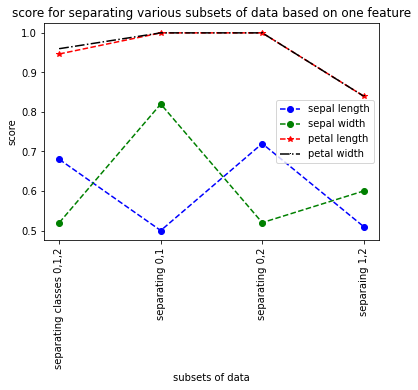

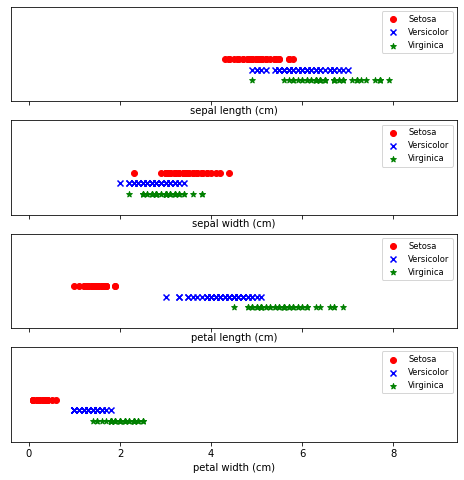

Variance of sepal length is 0.6856935123042506
Variance of sepal width is 0.189979418344519
Variance of petal length is 3.1162778523489933
Variance of petal width is 0.5810062639821029


In [ ]:
y1=dfA.loc['sepal length']
y2=dfA.loc['sepal width']
y3=dfA.loc['petal length']
y4=dfA.loc['petal width']
Xx=dfA.columns

plt.plot(Xx,y1,'bo--',label='sepal length')
plt.plot(Xx,y2,'go--',label='sepal width')
plt.plot(Xx,y3,'r*--',label='petal length')
plt.plot(Xx,y4,'k,-.',label='petal width')
plt.xlabel("subsets of data")
plt.xticks(rotation = 90)
plt.ylabel("score")
plt.title("score for separating various subsets of data based on one feature")
plt.legend()
plt.show()


X = iris.data#X variables:(1)sepal length(2)sepal width(3)petal length(4)petal width
Y = iris.target#Y variables:0 is Setota, 1 is Versicolor, 2 is Virginica
# plot data for all features 
plt.close('all')
fig, ax = plt.subplots(nrows=4, ncols=1, figsize= (8,8), sharex=True)
for i in range(4):
    x1F = IrisF[i]#Iris feature lablels
    ax[i].scatter(X[Y == IC[0], i], Xzeros0[Y == IC[0],i],
                  color=pltC[0], marker=pltM[0], label=IrisC[0])#use of masking index, IC[0]=0 which is for Setosa, i is the col number("feature")
    ax[i].scatter(X[Y == IC[1], i], Xzeros1[Y == IC[1],i], 
                  color=pltC[1], marker=pltM[1], label=IrisC[1])
    ax[i].scatter(X[Y == IC[2], i], Xzeros2[Y == IC[2],i], 
                  color=pltC[2], marker=pltM[2], label=IrisC[2])
    ax[i].set_xlim(x_min,x_max)
    ax[i].set_ylim(-.6,+1.2)
    ax[i].set_xlabel(x1F)
    ax[i].axes.yaxis.set_visible(False)
    ax[i].legend(loc='upper right',fontsize='small')
plt.show()    


sl=X[:,0]
print("Variance of sepal length is % s" %(statistics.variance(sl)))
sw=X[:,1]
print("Variance of sepal width is % s" %(statistics.variance(sw)))
pl=X[:,2]
print("Variance of petal length is % s" %(statistics.variance(pl)))
pw=X[:,3]
print("Variance of petal width is % s" %(statistics.variance(pw)))



```
**Separating various subsets of data based on one feature:**

*Separating based on petal length or petal width give us higher score.*

**Discussion**: according to the bottom graph(subplots), 

classes are more easily being separated if you are using petal length and petal width.

On the other hand, using sepal length and sepal width, 

there is quite a overlapping between classes; 

therefore, it is not easy to be separated, resulting in smaller score.

Based on the variance of all features and the subplot graph, 

it seems that petal length is a really good feature that can be used in separating classes.
```



Separating various subsets of data based on **one feature(2)**

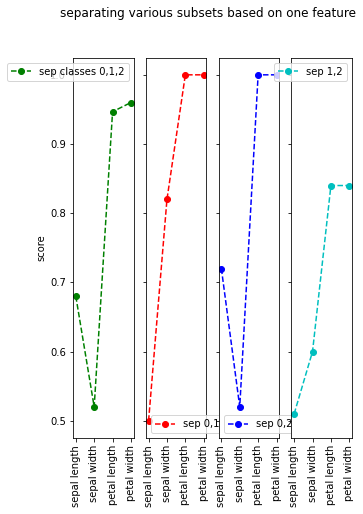

In [ ]:
y1f1=dfA.loc[['sepal length', 'sepal width', 'petal length', 'petal width'],["separating classes 0,1,2"]]
y1f2=dfA.loc[['sepal length', 'sepal width', 'petal length', 'petal width'],["separating 0,1"]]
y1f3=dfA.loc[['sepal length', 'sepal width', 'petal length', 'petal width'],["separating 0,2"]] 
y1f4=dfA.loc[['sepal length', 'sepal width', 'petal length', 'petal width'],["separaing 1,2"]]
xx1f=['sepal length', 'sepal width', 'petal length', 'petal width']

def plt_df(y1,y2,y3,y4,x,tl):
  fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize= (5,7),sharey=True)
  ax1.plot(x,y1,'go--',label="sep classes 0,1,2")
  ax1.set_xticklabels(x,rotation=90)
  ax1.set_ylabel("score")
  ax1.legend()
  ax2.plot(x,y2,'ro--',label="sep 0,1")
  ax2.set_xticklabels(x,rotation=90)
  ax2.legend()
  ax3.plot(x,y3,'bo--',label="sep 0,2")
  ax3.set_xticklabels(x,rotation=90)
  ax3.legend()
  ax4.plot(x,y4,'co--',label="sep 1,2")
  ax4.set_xticklabels(x,rotation=90)
  ax4.legend()
  fig.suptitle(tl)
  plt.show()

tlf1="separating various subsets based on one feature"
plt_df(y1f1,y1f2,y1f3,y1f4,xx1f,tlf1)

The graph above shows us the pattern:

separating classes based onpetal length or petal width gives us better score (see discussion in "Separating various subsets of data(two classes or three classes) based on one feature(1)").

Separating various subsets of data based on **two features**(1)

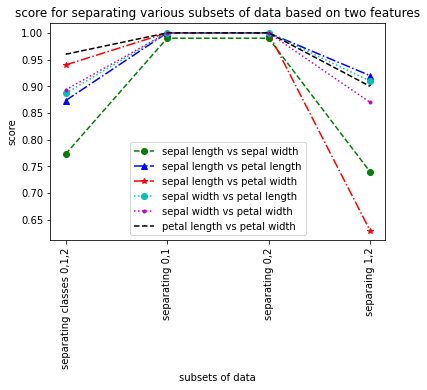

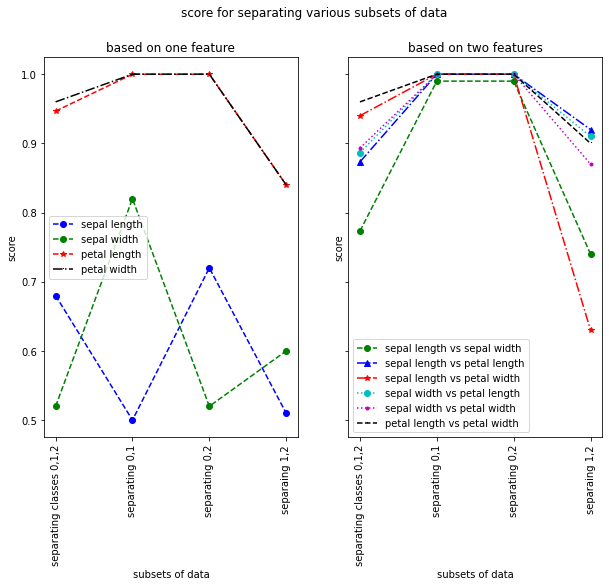

In [ ]:
y5=dfA.loc['sepal length vs sepal width']
y6=dfA.loc['sepal length vs petal length']
y7=dfA.loc['sepal length vs petal width']
y8=dfA.loc['sepal width vs petal length']
y9=dfA.loc['sepal width vs petal width']
y10=dfA.loc['petal length vs petal width']

plt.plot(Xx,y5,"go--",label='sepal length vs sepal width')
plt.plot(Xx,y6,"b^-.",label='sepal length vs petal length')
plt.plot(Xx,y7,"r*-.",label='sepal length vs petal width')
plt.plot(Xx,y8,'co:',label='sepal width vs petal length')
plt.plot(Xx,y9,"m.:",label='sepal width vs petal width')
plt.plot(Xx,y10,'k,--',label='petal length vs petal width')
plt.xlabel("subsets of data")
plt.xticks(rotation = 90)
plt.ylabel("score")
plt.title("score for separating various subsets of data based on two features")
plt.legend()
plt.show()

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,7),sharey=True)
ax1.plot(Xx,y1,'bo--',label='sepal length')
ax1.plot(Xx,y2,'go--',label='sepal width')
ax1.plot(Xx,y3,'r*--',label='petal length')
ax1.plot(Xx,y4,'k,-.',label='petal width')
ax1.set_xlabel("subsets of data")
#plt.xticks(rotation = 90)
ax1.set_xticklabels(Xx,rotation=90)
ax1.set_ylabel("score")
ax1.title.set_text("based on one feature")
ax1.legend()
ax2.plot(Xx,y5,"go--",label='sepal length vs sepal width')
ax2.plot(Xx,y6,"b^-.",label='sepal length vs petal length')
ax2.plot(Xx,y7,"r*-.",label='sepal length vs petal width')
ax2.plot(Xx,y8,'co:',label='sepal width vs petal length')
ax2.plot(Xx,y9,"m.:",label='sepal width vs petal width')
ax2.plot(Xx,y10,'k,--',label='petal length vs petal width')
ax2.set_xlabel("subsets of data")
#plt.xticks(rotation = 90)
ax2.set_xticklabels(Xx,rotation=90)
ax2.set_ylabel("score")
ax2.title.set_text("based on two features")
ax2.legend()
fig.suptitle("score for separating various subsets of data")
plt.show()



```
**# Separating subsets of data based on two features**

Comparing graghs("one feature" and "two features") side by side, we are kind of "improving our score" by using two features. 

When separating subsets of data based on one feature, our lowerst score is about 0.5(it happens four times); 

when sseparating subsets of data based on two features, our lowerst score is about 0.6(it happens only one time). 
```



Separating various subsets of data based on **two features**(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


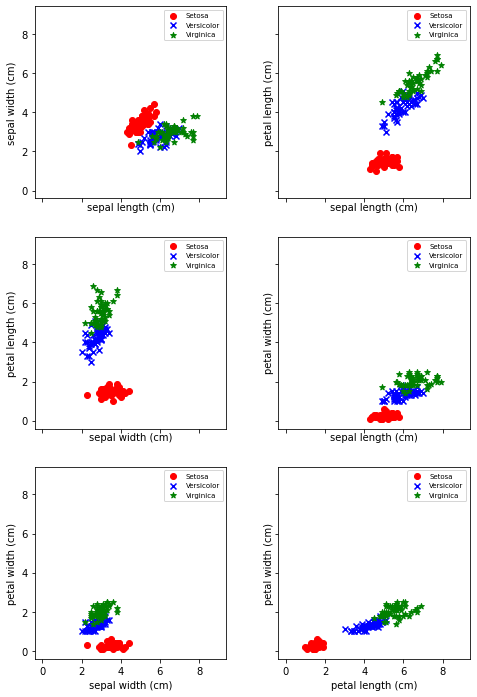

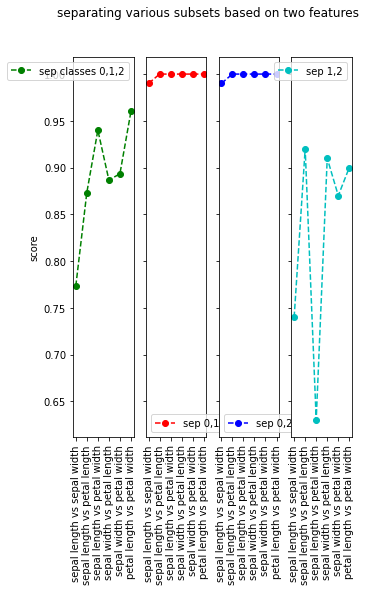

In [ ]:
# plot data for all pairs of features 
plt.close('all')
fig, ax = plt.subplots(nrows=3, ncols=2, figsize= (8,12), sharex=True, sharey=True)
i = 0
k = 0
k1 = 0
k2 = 0
while i < 4:
    x2F = IrisF[i]#Iris feature lablels
    j = 0
    while j < i:
        k1 = np.int(k/2)
        k2 = np.mod(k,2)
        x1F = IrisF[j]#Iris feature lablels
        ax[k1,k2].scatter(X[Y == IC[0], j], X[Y == IC[0], i], 
                          color=pltC[0], marker=pltM[0], label=IrisC[0])
        ax[k1,k2].scatter(X[Y == IC[1], j], X[Y == IC[1], i], 
                          color=pltC[1], marker=pltM[1], label=IrisC[1])
        ax[k1,k2].scatter(X[Y == IC[2], j], X[Y == IC[2], i], 
                          color=pltC[2], marker=pltM[2], label=IrisC[2])
        ax[k1,k2].set(aspect='equal')
        ax[k1,k2].set_xlim(x_min,x_max)
        ax[k1,k2].set_ylim(x_min,x_max)
        ax[k1,k2].set_xlabel(x1F)
        ax[k1,k2].set_ylabel(x2F)
        ax[k1,k2].legend(loc='upper right', fontsize='x-small')
        j += 1
        k += 1
    i += 1
plt.show()    

y2f1=dfA.loc[['sepal length vs sepal width', 'sepal length vs petal length',
       'sepal length vs petal width', 'sepal width vs petal length',
       'sepal width vs petal width', 'petal length vs petal width'],["separating classes 0,1,2"]]
y2f2=dfA.loc[['sepal length vs sepal width', 'sepal length vs petal length',
       'sepal length vs petal width', 'sepal width vs petal length',
       'sepal width vs petal width', 'petal length vs petal width'],["separating 0,1"]]
y2f3=dfA.loc[['sepal length vs sepal width', 'sepal length vs petal length',
       'sepal length vs petal width', 'sepal width vs petal length',
       'sepal width vs petal width', 'petal length vs petal width'],["separating 0,2"]] 
y2f4=dfA.loc[['sepal length vs sepal width', 'sepal length vs petal length',
       'sepal length vs petal width', 'sepal width vs petal length',
       'sepal width vs petal width', 'petal length vs petal width'],["separaing 1,2"]]
xx2f=['sepal length vs sepal width', 'sepal length vs petal length',
       'sepal length vs petal width', 'sepal width vs petal length',
       'sepal width vs petal width', 'petal length vs petal width']
# fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize= (5,7),sharey=True)
# ax1.plot(xx2f,y2f1,'go--',label="sep classes 0,1,2")
# ax1.set_xticklabels(xx2f,rotation=90)
# ax1.set_ylabel("score")
# ax1.legend()
# ax2.plot(xx2f,y2f2,'ro--',label="sep 0,1")
# ax2.set_xticklabels(xx2f,rotation=90)
# ax2.legend()
# ax3.plot(xx2f,y2f3,'bo--',label="sep 0,2")
# ax3.set_xticklabels(xx2f,rotation=90)
# ax3.legend()
# ax4.plot(xx2f,y2f4,'co--',label="sep 1,2")
# ax4.set_xticklabels(xx2f,rotation=90)
# ax4.legend()
# fig.suptitle("separating various subsets based on two features")
# plt.show()
tlf2="separating various subsets based on two features"
plt_df(y2f1,y2f2,y2f3,y2f4,xx2f,tlf2)



```
# Based on the graph "separating various subsets based on two features",

it is easier for us to (1)separate class 0 from class 1("Setosa" versus "Versicolor") and 

(2)separate class 0 from class 2("Setosa" versus "Virginica");

"sep 0, 1" and "sep 0,2" based on two features have higher score.

The complexity of seperating classes(any two classes or all three classes) be observed from 3-2 subplot graph.

A line of linear separability can be easily drawn 

(1)between red dots("Setosa") and blue dots("Versicolor") **and** (2)red dots("Setosa") and green dots("Virginica"),

while there is quite a lot of overlapping between blue dots("Versicolor") and green dots("Virginica") based on any two features.

Also, it can be observed that seperating threes classes based on two features have 

scores somewhere between "good score"("Setosa" versus "Versicolor" and "Setosa" versus "Virginica" based on two features) and "bad score"("Versicolor" vs  "Virginica").
```



Separating various subsets of data based on **three/four features**(1)

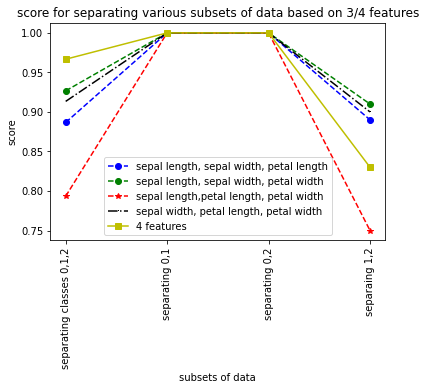

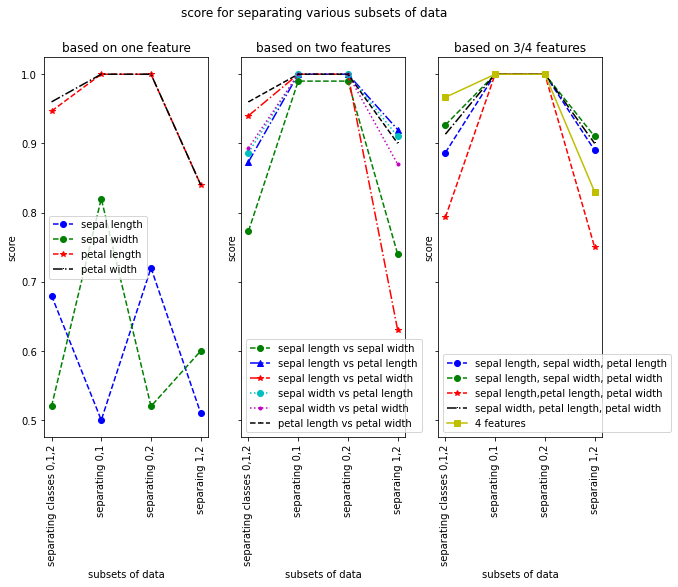

In [ ]:
y11=dfA.loc['sepal length, sepal width, petal length']
y12=dfA.loc['sepal length, sepal width, petal width']
y13=dfA.loc[ 'sepal length,petal length, petal width']
y14=dfA.loc['sepal width, petal length, petal width']
y15=dfA.loc['4 features']

plt.plot(Xx,y11,'bo--',label='sepal length, sepal width, petal length')
plt.plot(Xx,y12,'go--',label='sepal length, sepal width, petal width')
plt.plot(Xx,y13,'r*--',label='sepal length,petal length, petal width')
plt.plot(Xx,y14,'k,-.',label='sepal width, petal length, petal width')
plt.plot(Xx,y15,'ys-',label='4 features',)
plt.xlabel("subsets of data")
plt.xticks(rotation = 90)
plt.ylabel("score")
plt.title("score for separating various subsets of data based on 3/4 features")
plt.legend()
plt.show()

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10,7),sharey=True)
ax1.plot(Xx,y1,'bo--',label='sepal length')
ax1.plot(Xx,y2,'go--',label='sepal width')
ax1.plot(Xx,y3,'r*--',label='petal length')
ax1.plot(Xx,y4,'k,-.',label='petal width')
ax1.set_xlabel("subsets of data")
#plt.xticks(rotation = 90)
ax1.set_xticklabels(Xx,rotation=90)
ax1.set_ylabel("score")
ax1.title.set_text("based on one feature")
ax1.legend()
ax2.plot(Xx,y5,"go--",label='sepal length vs sepal width')
ax2.plot(Xx,y6,"b^-.",label='sepal length vs petal length')
ax2.plot(Xx,y7,"r*-.",label='sepal length vs petal width')
ax2.plot(Xx,y8,'co:',label='sepal width vs petal length')
ax2.plot(Xx,y9,"m.:",label='sepal width vs petal width')
ax2.plot(Xx,y10,'k,--',label='petal length vs petal width')
ax2.set_xlabel("subsets of data")
#plt.xticks(rotation = 90)
ax2.set_xticklabels(Xx,rotation=90)
ax2.set_ylabel("score")
ax2.title.set_text("based on two features")
ax2.legend()
ax3.plot(Xx,y11,'bo--',label='sepal length, sepal width, petal length')
ax3.plot(Xx,y12,'go--',label='sepal length, sepal width, petal width')
ax3.plot(Xx,y13,'r*--',label='sepal length,petal length, petal width')
ax3.plot(Xx,y14,'k,-.',label='sepal width, petal length, petal width')
ax3.plot(Xx,y15,'ys-',label='4 features')
ax3.set_xlabel("subsets of data")
ax3.set_xticklabels(Xx,rotation=90)
ax3.set_ylabel("score")
ax3.title.set_text("based on 3/4 features")
ax3.legend()
fig.suptitle("score for separating various subsets of data")
plt.show()



```
**# separating subsets of data based on three/four features**

comparing the graphs for "two features" and "3/4 features", 

it is clear that we are improving the lowerst score by separating classes using three/four features.

When separating subsets of data based on two features, the lowest score is about 0.6;

when separating subsets based on three/four features, the lowerst score is about 0.75.
```



Separating various subsets of data based on **three/four features**(2)

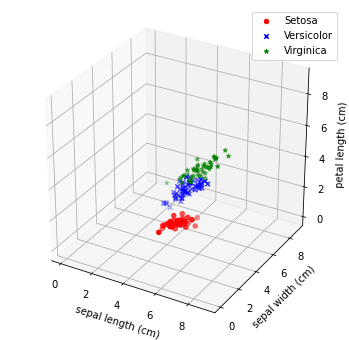

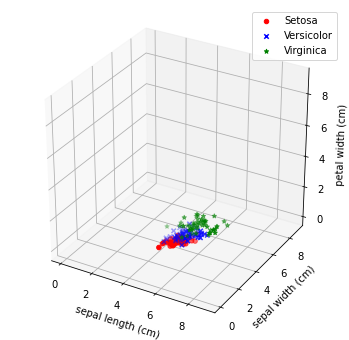

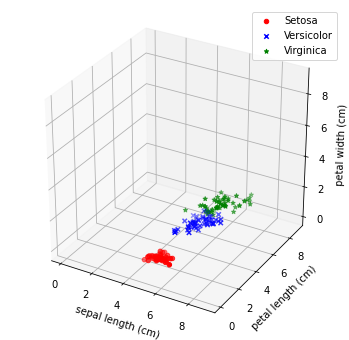

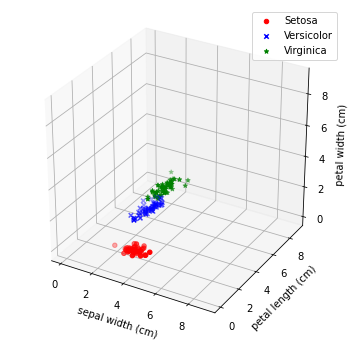

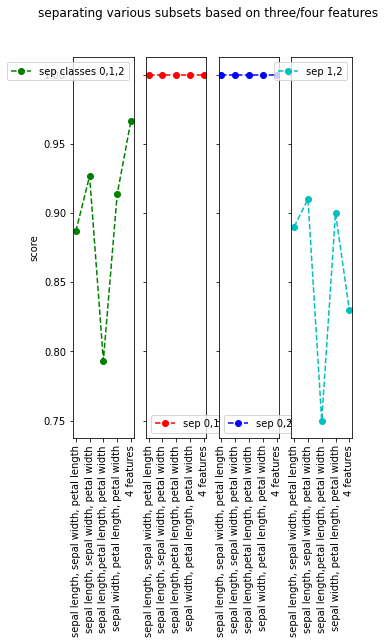

In [ ]:
# plot data for all combinations of three features 

plt.close('all')

ix = [0,0,0,1]
iy = [1,1,2,2]
iz = [2,3,3,3]

for m in range(4):
    
    ixm = ix[m]
    iym = iy[m]
    izm = iz[m]
    xF = IrisF[ixm]
    yF = IrisF[iym]
    zF = IrisF[izm]

    fig = plt.figure(figsize=(6,6))    
    ax = plt.axes(projection='3d')   
    
    ax.scatter3D(X[Y == IC[0],ixm], X[Y == IC[0],iym], X[Y == IC[0],izm], 
        color=pltC[0], marker=pltM[0], label=IrisC[0])
    ax.scatter3D(X[Y == IC[1],ixm], X[Y == IC[1],iym], X[Y == IC[1],izm], 
        color=pltC[1], marker=pltM[1], label=IrisC[1])
    ax.scatter3D(X[Y == IC[2],ixm], X[Y == IC[2],iym], X[Y == IC[2],izm], 
        color=pltC[2], marker=pltM[2], label=IrisC[2])
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(x_min,x_max)
    ax.set_zlim(x_min,x_max)
    ax.set_xlabel(xF)
    ax.set_ylabel(yF)
    ax.set_zlabel(zF)            
    ax.legend(loc='upper right', fontsize='medium')
plt.show() 


y3f1=dfA.loc[['sepal length, sepal width, petal length',
       'sepal length, sepal width, petal width',
       'sepal length,petal length, petal width',
       'sepal width, petal length, petal width', '4 features'],["separating classes 0,1,2"]]
y3f2=dfA.loc[['sepal length, sepal width, petal length',
       'sepal length, sepal width, petal width',
       'sepal length,petal length, petal width',
       'sepal width, petal length, petal width', '4 features'],["separating 0,1"]]
y3f3=dfA.loc[['sepal length, sepal width, petal length',
       'sepal length, sepal width, petal width',
       'sepal length,petal length, petal width',
       'sepal width, petal length, petal width', '4 features'],["separating 0,2"]] 
y3f4=dfA.loc[['sepal length, sepal width, petal length',
       'sepal length, sepal width, petal width',
       'sepal length,petal length, petal width',
       'sepal width, petal length, petal width', '4 features'],["separaing 1,2"]]
xx3f=['sepal length, sepal width, petal length',
       'sepal length, sepal width, petal width',
       'sepal length,petal length, petal width',
       'sepal width, petal length, petal width', '4 features']

# fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize= (5,7),sharey=True)
# ax1.plot(xx3f,y3f1,'go--',label="sep classes 0,1,2")
# ax1.set_xticklabels(xx3f,rotation=90)
# ax1.set_ylabel("score")
# ax1.legend()
# ax2.plot(xx3f,y3f2,'ro--',label="sep 0,1")
# ax2.set_xticklabels(xx3f,rotation=90)
# ax2.legend()
# ax3.plot(xx3f,y3f3,'bo--',label="sep 0,2")
# ax3.set_xticklabels(xx3f,rotation=90)
# ax3.legend()
# ax4.plot(xx3f,y3f4,'co--',label="sep 1,2")
# ax4.set_xticklabels(xx3f,rotation=90)
# ax4.legend()
# fig.suptitle("separating various subsets based on two features")
# plt.show()
tlf3="separating various subsets based on three/four features"
plt_df(y3f1,y3f2,y3f3,y3f4,xx3f,tlf3)

Similar trends are observed when separating classes based on three/four features 

as we have seen when separating classes using two features.

when separating (1)"Setosa" and "Versicolor"& (2)"Setosa" and "Virginica" based on three/four features, 

we have really high scores(a score of 1).

Meanwhile, when separating "Versicolor" and "Virginica" based on 3/4 features, 

the scores are relatively low.

When separating three classes, the score is 

somewhere between "good score"(separating "Setosa" vs "Versicolor" & "Setosa" vs "Virginica") and "bad score"(separating "Versicolor" and "Virginica").

The same explanation(please refer back to "Separating various subsets of data based on two features(2)")



# Conclusion and Future Research

1.   see **dataframe** that includes scores for separating classes(2 classes or 3 classes) 

based on various combinations of features in **section** **"Dataset-Model pairs (4 x 15) Part 6"**

2.   **see detailed analysis in section "Visualizations and Discussion"**

A **graph** is shown below so that you can see 

scores for various combinations of features and various subsets of data(2 classes and 3 classes) 

**Future research:**

(1) How does the feature selection improve the accuracy of the model?

(2)How loss function chosen will impact our analysis?

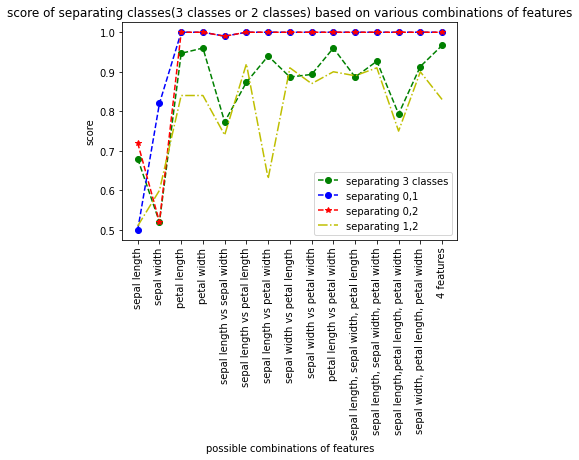

In [ ]:
X=dfA.index
plt.plot(X,dfA['separating classes 0,1,2'],"go--",label="separating 3 classes")
plt.plot(X,dfA['separating 0,1'],'bo--',label="separating 0,1")
plt.plot(X,dfA['separating 0,2'],'r*--',label="separating 0,2",)
plt.plot(X,dfA['separaing 1,2'],'y-.',label="separating 1,2",)
plt.xlabel("possible combinations of features")
plt.xticks(rotation = 90)
plt.ylabel("score")
plt.title("score of separating classes(3 classes or 2 classes) based on various combinations of features")
plt.legend()
plt.show()

From the visualization above, it is clear that separating 0,1 and separating 0,2("Setosa" vs "Versicolor" and "Setosa" vs "Virginica") based on two/more features have much better scores than ones of separating 1,2("Versicolor" vs "Virginica") and separating 3 classes; 

blue line("separating 0,1") and red line("separating 0,2") are situated way above yellow line(separating 1,2) and green line(separating 3 classes) for scenarios of two and more features.

**In addition**, it can be observed that separating 3 classes based on two/more features have slightly beter scores compared with the scores of separating 1,2("Versicolor" vs "Virginica");

green line("separating 3 classes") locates slightly above yellow line("separating 1,2") in most scenarios of two and more features.

**Further**, for separating classes(either two classes or three classes), separating based on petal length and petal width results in higher score(compared with sepal length and sepal width).

(Detailed discussion of the above detected trends can be found in "Visualizations and Discussion")

**Future research**

1. In general, scores will vary based on various combinations of features. Which combination result in the best score in separating classes? If a dataset has a cornucopia of features, **how can we easily decide which combination of features to use** without going through all the trials we have done so far? 

2. In addition, we have seen **the selection of loss function will impact the score** when separating classes that are not easily linearly separable. However, given the time constaint, we might not have time to explore it furthur. For the future, we can also investigate the impact of the selection of loss function on the score.



